<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Vivek_46_DA_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OEIT6, Data Analytics 2022

Name : Vivek Rajput

UID No. : 2019110046

Class : BE ETRX

Date : 31/08/2022

Lab 1: Exploratory Data Analysis

---

**Objective**: 

>>Perform EDA such as number of data samples, number of features, number of classes, number 
of data samples per class, removing missing values, conversion to numbers, using seaborn 
library to plot different graphs. 

---

**Theory**:
Prior to the use of any forecasting methods, we do load data analysis. Using various statistical estimates
we extract the features of the data. The statistical features are mean, variance, correlation analysis,
and auto-correlation analysis. Correlation analysis is done to find out the movement of one time series
with another, eg. we estimate the correlation of load data and temperature data. In data analysis, we
also detect the bad data entries or outliers and manage / replace them. Correlation study also helps in
finding the best correlated day in the recent past for forecasting the load - we call them as reference days.
These reference days capture the effect of economic factors, seasonality, and time factors. Along with
the reference days, weather inputs are provided to the forecasting engine for deriving an output. Days
are divided into normal days, holidays and special days (e.g.) categories.For each category, we have
different models.
Data provided by TPDDL has following parameters
1. Load (MW)
2. Temperature (OC)
3. Humidity (%)



---

**Code and Output:**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('DatasetLoad.csv')

>> Snippet imports the necessary libraries for performing data analysis. Pandas is used to display the data frame and seaborn is used for plotting specifc graphs.

---



In [2]:
df.info

<bound method DataFrame.info of           Time  12:00 AM  03:00 AM  06:00 AM  09:00 AM  12:00 PM  15:00 PM  \
0     1 Jan 18      66.8      73.8      73.1      65.9      65.9      71.3   
1     2 Jan 18      66.0      62.3      59.8      57.5      62.0      68.0   
2     3 Jan 18      64.7      66.2      71.1      70.0      74.3      74.1   
3     4 Jan 18      76.3      81.2      87.9      80.1      75.8      75.7   
4     5 Jan 18      80.1      82.0      81.0      80.4      73.0      66.8   
..         ...       ...       ...       ...       ...       ...       ...   
375  11 Jan 19      67.0      70.7      68.6      63.9      68.1      65.7   
376  12 Jan 19      71.8      68.5      80.9      76.8      70.4      63.6   
377  13 Jan 19      65.2      67.9      61.2      54.4      65.3      65.7   
378  14 Jan 19      68.8      62.2      57.3      59.3      68.0      67.3   
379  15 Jan 19      69.4      70.3      58.5      64.0      73.4      72.1   

     18:00 PM  21:00 PM  23:45 

>> It gives a summary of the data type of each attribute in the dataset. This helps in determining which attributes can be used for numerical analysis.

---



In [3]:
df.head()

,Time,12:00 AM,03:00 AM,06:00 AM,09:00 AM,12:00 PM,15:00 PM,18:00 PM,21:00 PM,23:45 PM,Average Load,Maximum Load,Minimum Load,Time.1,Maximum Humidity,Minimum Humidity,Average Humidity,Temp.,Days
0,1 Jan 18,66.8,73.8,73.1,65.9,65.9,71.3,63.0,62.3,60.3,409.730000,547.67,278.15,1 Jan 18,73.8,60.3,66.933333,24.166667,Monday
1,2 Jan 18,66.0,62.3,59.8,57.5,62.0,68.0,70.9,68.1,65.0,434.843333,600.32,263.38,2 Jan 18,70.9,57.5,64.400000,24.055556,Tuesday
2,3 Jan 18,64.7,66.2,71.1,70.0,74.3,74.1,74.1,66.1,73.1,427.794444,588.55,266.85,3 Jan 18,74.3,64.7,70.411111,24.000000,Wednesday
3,4 Jan 18,76.3,81.2,87.9,80.1,75.8,75.7,73.5,71.6,78.8,455.438889,625.62,272.11,4 Jan 18,87.9,71.6,77.877778,24.011111,Thursday
4,5 Jan 18,80.1,82.0,81.0,80.4,73.0,66.8,63.1,72.5,64.5,452.884444,627.95,274.89,5 Jan 18,82.0,63.1,73.711111,23.966667,Friday


>> The above snipppet is used to view the first view rows of the data set.

---



In [4]:
df.tail()

,Time,12:00 AM,03:00 AM,06:00 AM,09:00 AM,12:00 PM,15:00 PM,18:00 PM,21:00 PM,23:45 PM,Average Load,Maximum Load,Minimum Load,Time.1,Maximum Humidity,Minimum Humidity,Average Humidity,Temp.,Days
375,11 Jan 19,67.0,70.7,68.6,63.9,68.1,65.7,69.6,60.6,68.7,426.888889,589.45,246.43,11 Jan 19,70.7,60.6,66.988889,23.977778,Friday
376,12 Jan 19,71.8,68.5,80.9,76.8,70.4,63.6,60.6,64.3,65.8,391.378889,521.35,247.52,12 Jan 19,80.9,60.6,69.188889,23.477778,Saturday
377,13 Jan 19,65.2,67.9,61.2,54.4,65.3,65.7,70.3,65.7,67.5,333.270000,405.74,242.08,13 Jan 19,70.3,54.4,64.800000,23.522222,Sunday
378,14 Jan 19,68.8,62.2,57.3,59.3,68.0,67.3,68.9,64.4,67.7,417.647778,577.17,234.81,14 Jan 19,68.9,57.3,64.877778,23.800000,Monday
379,15 Jan 19,69.4,70.3,58.5,64.0,73.4,72.1,75.5,57.2,68.2,437.332222,607.11,252.14,15 Jan 19,75.5,57.2,67.622222,24.755556,Tuesday


>> The above snipppet is used to view the last view rows of the data set.

---



---



In [5]:
df.shape

(380, 19)

>> Total no. of rows and column

---



In [6]:
df.describe()


,12:00 AM,03:00 AM,06:00 AM,09:00 AM,12:00 PM,15:00 PM,18:00 PM,21:00 PM,23:45 PM,Average Load,Maximum Load,Minimum Load,Maximum Humidity,Minimum Humidity,Average Humidity,Temp.
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,74.060526,74.739211,72.271316,72.613158,74.368158,75.007632,74.646842,73.531316,74.062632,544.753576,698.997895,390.158974,79.383421,68.187105,73.922310,27.411228
std,8.872160,9.242832,11.185375,10.303699,7.999539,7.794029,8.743237,9.541214,8.572492,84.920198,120.260666,75.900174,6.866308,11.180055,8.299033,1.726074
min,45.400000,46.000000,38.300000,35.200000,50.300000,47.400000,44.400000,43.700000,46.500000,332.122222,396.020000,234.810000,54.500000,35.200000,47.566667,23.444444
25%,68.275000,68.675000,65.275000,66.975000,70.075000,69.650000,68.900000,66.900000,68.375000,477.328056,614.415000,342.252500,75.600000,60.450000,68.633333,26.477778
50%,75.000000,76.900000,75.600000,75.100000,75.750000,76.850000,75.700000,74.700000,75.200000,553.661111,722.520000,390.315000,80.950000,69.750000,74.711111,27.527778
75%,81.250000,82.100000,80.925000,80.450000,80.725000,81.225000,82.000000,81.425000,81.200000,601.958611,779.635000,450.720000,84.300000,77.625000,80.713889,28.888889
max,97.900000,98.700000,92.900000,88.600000,91.000000,87.300000,89.400000,92.100000,89.200000,720.181111,938.810000,540.360000,98.700000,84.900000,88.344444,30.211111


>> It describes the statitical parameters of each attribute in the dataset.

---



In [7]:
df.columns

Index(['Time', '12:00 AM', '03:00 AM', '06:00 AM', '09:00 AM', '12:00 PM',
       '15:00 PM', '18:00 PM', '21:00 PM', '23:45 PM', 'Average Load',
       'Maximum Load', 'Minimum Load', 'Time.1', 'Maximum Humidity',
       'Minimum Humidity', 'Average Humidity', 'Temp.', 'Days'],
      dtype='object')

>> It gives an idea of all attributes used in the dataset

---



In [8]:
df.nunique()

Time                380
12:00 AM            219
03:00 AM            223
06:00 AM            229
09:00 AM            221
12:00 PM            203
15:00 PM            193
18:00 PM            215
21:00 PM            228
23:45 PM            214
Average Load        379
Maximum Load        375
Minimum Load        377
Time.1              380
Maximum Humidity    194
Minimum Humidity    231
Average Humidity    350
Temp.               278
Days                  7
dtype: int64

>> The above function is used to get the unique values in each attribute.

---



In [9]:
df.isnull().sum()

Time                0
12:00 AM            0
03:00 AM            0
06:00 AM            0
09:00 AM            0
12:00 PM            0
15:00 PM            0
18:00 PM            0
21:00 PM            0
23:45 PM            0
Average Load        0
Maximum Load        0
Minimum Load        0
Time.1              0
Maximum Humidity    0
Minimum Humidity    0
Average Humidity    0
Temp.               0
Days                0
dtype: int64

>> The above function is used to check if any null values are present in the dataset. If present, they can be removed and cleaned. But the exisisting dataset does not contain any null values.

---



In [10]:
df.dropna()

,Time,12:00 AM,03:00 AM,06:00 AM,09:00 AM,12:00 PM,15:00 PM,18:00 PM,21:00 PM,23:45 PM,Average Load,Maximum Load,Minimum Load,Time.1,Maximum Humidity,Minimum Humidity,Average Humidity,Temp.,Days
0,1 Jan 18,66.8,73.8,73.1,65.9,65.9,71.3,63.0,62.3,60.3,409.730000,547.67,278.15,1 Jan 18,73.8,60.3,66.933333,24.166667,Monday
1,2 Jan 18,66.0,62.3,59.8,57.5,62.0,68.0,70.9,68.1,65.0,434.843333,600.32,263.38,2 Jan 18,70.9,57.5,64.400000,24.055556,Tuesday
2,3 Jan 18,64.7,66.2,71.1,70.0,74.3,74.1,74.1,66.1,73.1,427.794444,588.55,266.85,3 Jan 18,74.3,64.7,70.411111,24.000000,Wednesday
3,4 Jan 18,76.3,81.2,87.9,80.1,75.8,75.7,73.5,71.6,78.8,455.438889,625.62,272.11,4 Jan 18,87.9,71.6,77.877778,24.011111,Thursday
4,5 Jan 18,80.1,82.0,81.0,80.4,73.0,66.8,63.1,72.5,64.5,452.884444,627.95,274.89,5 Jan 18,82.0,63.1,73.711111,23.966667,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,11 Jan 19,67.0,70.7,68.6,63.9,68.1,65.7,69.6,60.6,68.7,426.888889,589.45,246.43,11 Jan 19,70.7,60.6,66.988889,23.977778,Friday
376,12 Jan 19,71.8,68.5,80.9,76.8,70.4,63.6,60.6,64.3,65.8,391.378889,521.35,247.52,12 Jan 19,80.9,60.6,69.188889,23.477778,Saturday
377,13 Jan 19,65.2,67.9,61.2,54.4,65.3,65.7,70.3,65.7,67.5,333.270000,405.74,242.08,13 Jan 19,70.3,54.4,64.800000,23.522222,Sunday
378,14 Jan 19,68.8,62.2,57.3,59.3,68.0,67.3,68.9,64.4,67.7,417.647778,577.17,234.81,14 Jan 19,68.9,57.3,64.877778,23.800000,Monday


In [11]:
df2=df.dropna()

>> The user to analyze and drop Rows/Columns with Null values in different ways.

---



In [12]:
correlation=df2.corr()

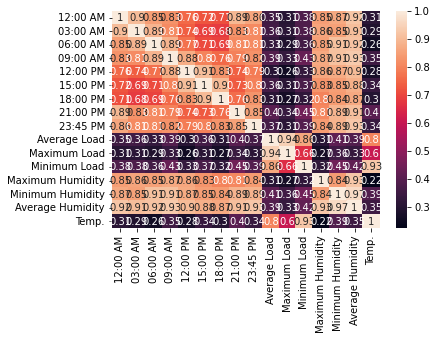

In [13]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

>> The above plot shows the correlation matrix of the dataset. The correlation values lie between -1 and 1 with 1 showing highest correlation or similarity whereas -1 shows inverse relation between the two attributes.

---



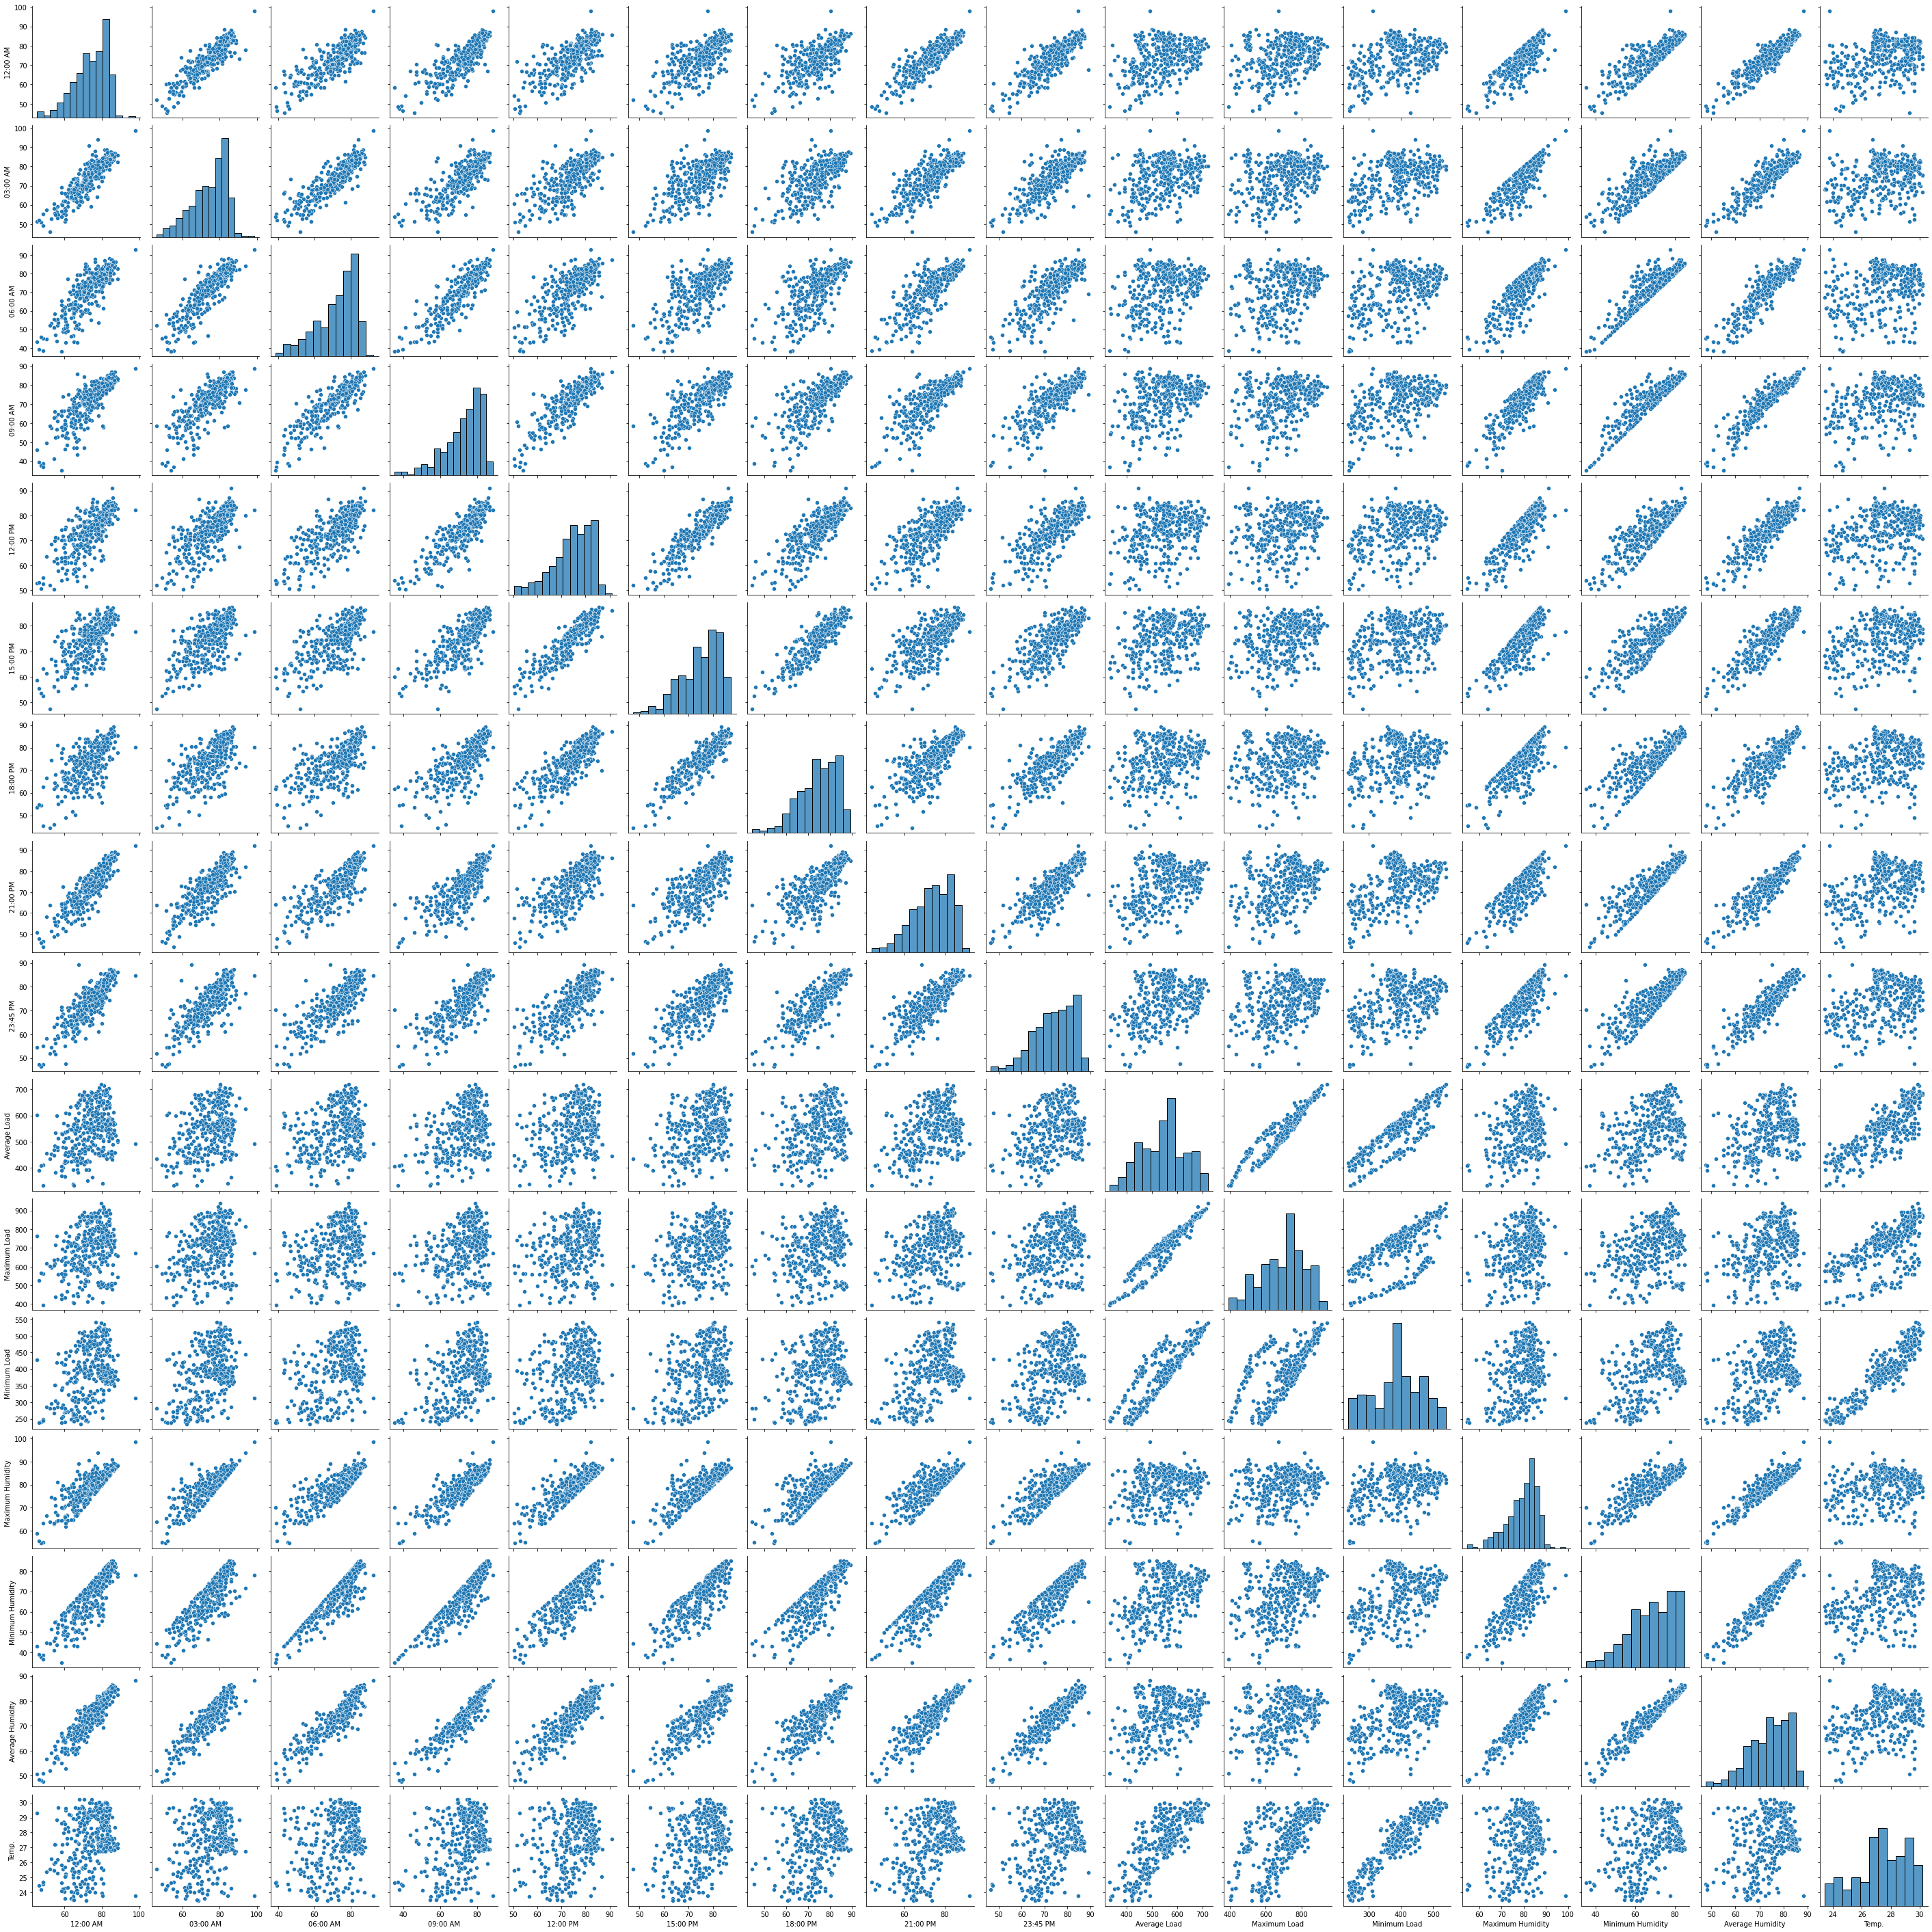

In [ ]:
sns.pairplot(df)

>> Seaborn Pairplot uses to get the relation between each and every variable present in Pandas DataFrame. It works like a seaborn scatter plot but it plot only two variables plot and sns paiplot plot the pairwise plot of multiple features/variable in a grid format.

---
>> Below, The load data has been analyzed for maximum, minimum, and average load


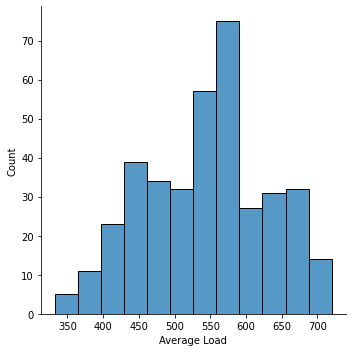

In [14]:
sns.displot(df['Average Load'])

>> sns.distplot() function allow keyword arguments (kws) to plot histogram beautiful way.

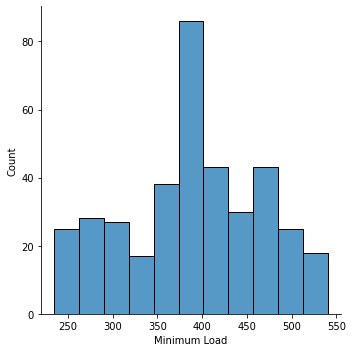

In [15]:
sns.displot(df['Minimum Load'])

>> To plot one and multiple histograms with a real-time example using sns.distplot() function. Along with that used different function with different parameter and keyword arguments.

---



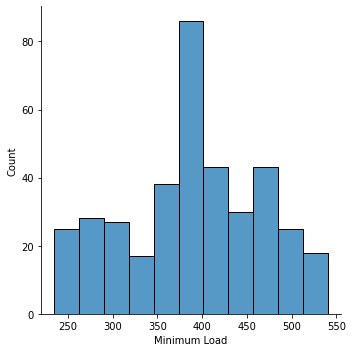

In [16]:
import seaborn as sns
sns.displot(df['Minimum Load'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


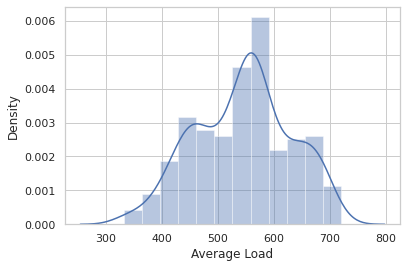

In [17]:
import seaborn as sb
sb.set()
sb.set_style('whitegrid')
sb.distplot(df['Average Load'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


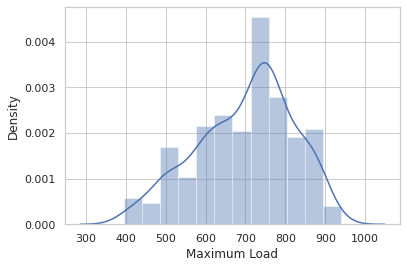

In [18]:
sb.distplot(df['Maximum Load'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


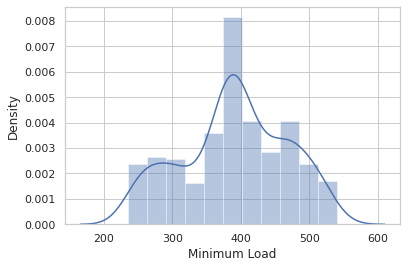

In [19]:
sb.distplot(df['Minimum Load'])

>> Above Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. 

---



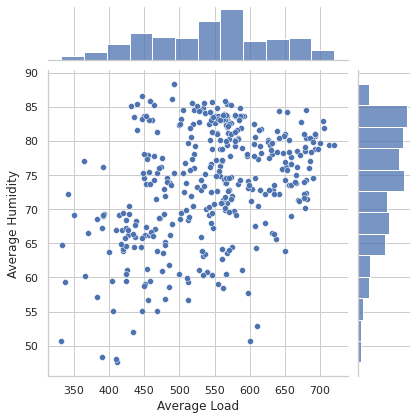

In [20]:
sns.jointplot(x = df["Average Load"], y = df["Average Humidity"], kind = "scatter")

>> Above Plot Between Average Load and Average Humidity with scattering

>>Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use :class:’JointGrid’ directly.

---



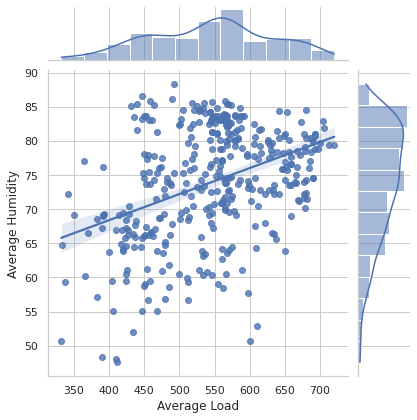

In [21]:
sns.jointplot(x = df["Average Load"], y = df["Average Humidity"], kind = "reg")

>> Above Plot Between Average Load and Average Humidity with regression.**bold text**

>>Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use :class:’JointGrid’ directly.

---



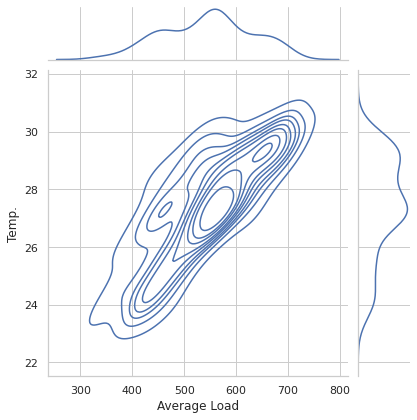

In [22]:
sns.jointplot(x = df["Average Load"], y = df["Temp."], kind = "kde")

>> Above Plot Between Average Load and Average Humidity with regression.**bold text**

>> Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use :class:’JointGrid’ directly.
>> will draw both bivariate and univariate KDEs

---



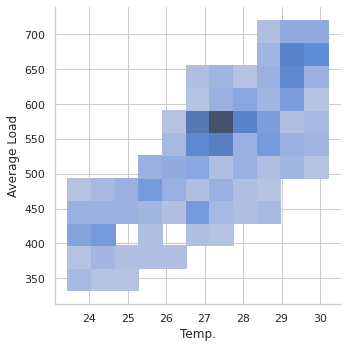

In [23]:
import seaborn as sns
sns.displot(x=df['Temp.'],y=df['Average Load'])

In [24]:
df.corr()

,12:00 AM,03:00 AM,06:00 AM,09:00 AM,12:00 PM,15:00 PM,18:00 PM,21:00 PM,23:45 PM,Average Load,Maximum Load,Minimum Load,Maximum Humidity,Minimum Humidity,Average Humidity,Temp.
12:00 AM,1.000000,0.903674,0.846265,0.825028,0.755164,0.723790,0.712103,0.894553,0.861636,0.353314,0.305496,0.381717,0.847944,0.866942,0.924084,0.310332
03:00 AM,0.903674,1.000000,0.889064,0.812285,0.737484,0.692741,0.684334,0.825825,0.809038,0.360093,0.313307,0.383288,0.857598,0.852123,0.906014,0.287900
06:00 AM,0.846265,0.889064,1.000000,0.889151,0.767259,0.707212,0.694090,0.809098,0.811937,0.330447,0.289223,0.362045,0.849124,0.912184,0.916720,0.258050
09:00 AM,0.825028,0.812285,0.889151,1.000000,0.875495,0.797468,0.755127,0.794350,0.824701,0.393111,0.333010,0.429507,0.867483,0.913392,0.931124,0.354034
12:00 PM,0.755164,0.737484,0.767259,0.875495,1.000000,0.908645,0.829270,0.739815,0.785498,0.304776,0.256604,0.330798,0.860619,0.871197,0.900289,0.275058
15:00 PM,0.723790,0.692741,0.707212,0.797468,0.908645,1.000000,0.902722,0.730645,0.796357,0.360971,0.308912,0.374109,0.829410,0.847241,0.879691,0.336747
18:00 PM,0.712103,0.684334,0.694090,0.755127,0.829270,0.902722,1.000000,0.760714,0.827327,0.308897,0.266566,0.321907,0.798927,0.840199,0.869587,0.298497
21:00 PM,0.894553,0.825825,0.809098,0.794350,0.739815,0.730645,0.760714,1.000000,0.852068,0.403808,0.341055,0.445834,0.808711,0.890716,0.909261,0.403779
23:45 PM,0.861636,0.809038,0.811937,0.824701,0.785498,0.796357,0.827327,0.852068,1.000000,0.366227,0.313910,0.394061,0.839562,0.885718,0.925514,0.339846
Average Load,0.353314,0.360093,0.330447,0.393111,0.304776,0.360971,0.308897,0.403808,0.366227,1.000000,0.943173,0.863522,0.306183,0.412685,0.390329,0.801750




>>pearson: standard correlation coefficient 

>>kendall: Kendall Tau correlation coefficient

>>spearman: Spearman rank correlation

>>min_periods : Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation 

---



**Conclusion**:
>> This report presented the comprehensive load data analysis. The correlation analysis of load vs load and
load vs temperature and load vs DI is presented. We have also discussed the data validation and list
the anomalous days in the given data set. We have discussed and applied several methods for day ahead
forecasting on the TPDDL data set. 

---

**Future Scope:**

We emphasize to work on the following action items
1. Strengthen weather model for Delhi region.
2. Optimize the parameters for TPDDL data set.
3. Applying combination approach for TPDDL data set.
4. Sunday model will be improved further.

---

